# Playground

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

image_planes = 3
image_width = 500
image_height = 500
image_depth = 1;

In [2]:
# Read the data: Features and Label for 3 planes
features = [pd.read_csv("input_files/U_Feature.csv"), 
            pd.read_csv("input_files/V_Feature.csv"), 
            pd.read_csv("input_files/W_Feature.csv")]
labels = [pd.read_csv("input_files/U_Label.csv"), 
          pd.read_csv("input_files/V_Label.csv"), 
          pd.read_csv("input_files/W_Label.csv")]

# Feature is the adc values
# Scale it such that each value is between 0 and 1
#for i in range(image_planes):
#    min_max_scaler = MinMaxScaler() 
#    features_scaled = min_max_scaler.fit_transform(features[i]) 
#    features[i].loc[:,:] = features_scaled
#features[0].head()

In [4]:
# Get a Numpy representation of the DataFrame
X = []
y = []
for i in range(image_planes):
    X.append(features[i].values.reshape(features[i].shape[0], image_width, image_height, image_depth))
    y.append(labels[i].values.reshape(labels[i].shape[0], image_width, image_height, image_depth))

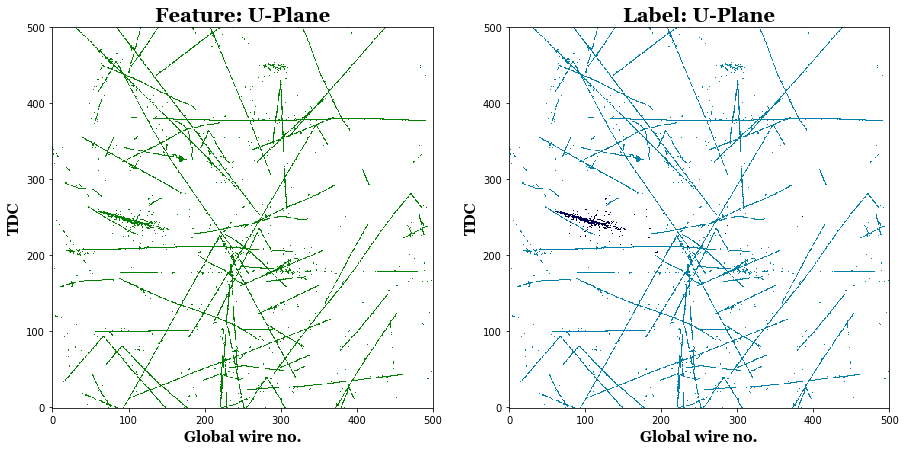

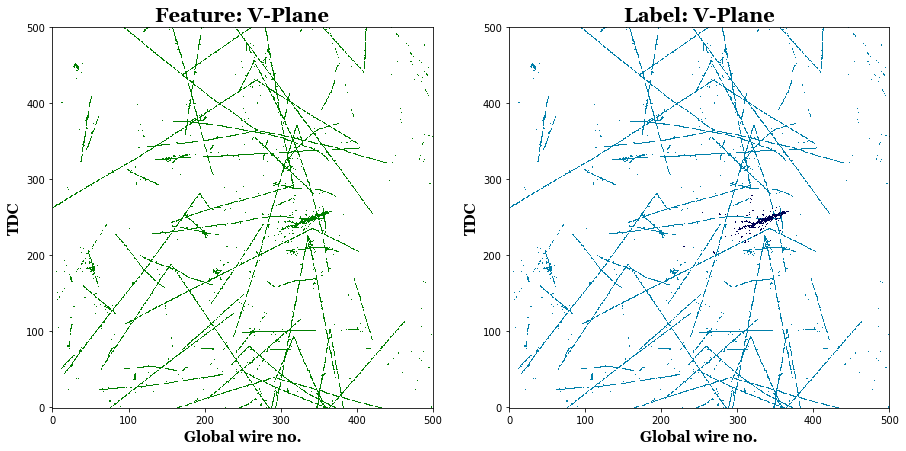

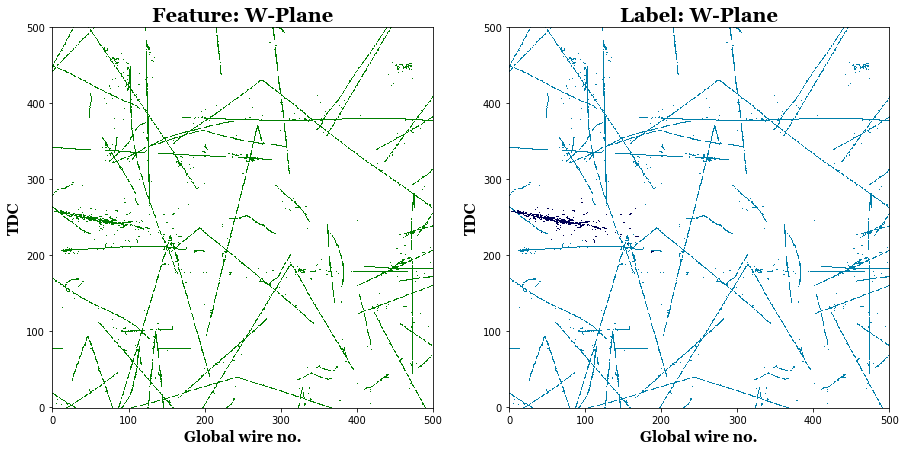

In [7]:
plane_name = ['U-Plane', 'V-Plane', 'W-Plane']

for i in range(image_planes):
    xImage = X[i].reshape(X[i].shape[0], image_width, image_height)
    yImage = y[i].reshape(y[i].shape[0], image_width, image_height)

    fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(15,10), facecolor='w')
    ax0.imshow(xImage[0], interpolation='none',cmap='ocean_r', origin='lower',vmin=0.0, vmax=1.0)
    ax0.set_xlabel("Global wire no.", fontsize=15, fontname='Georgia',fontweight='bold')
    ax0.set_ylabel("TDC", fontsize=15, fontname='Georgia',fontweight='bold')
    ax0.set_title('Feature: {}'.format(plane_name[i]), fontsize=20,fontname='Georgia',fontweight='bold')

    ax1.imshow(yImage[0], interpolation='none',cmap='ocean_r', origin='lower',vmin=0.0, vmax=3.0)
    ax1.set_xlabel("Global wire no.", fontsize=15, fontname='Georgia',fontweight='bold')
    ax1.set_ylabel("TDC", fontsize=15, fontname='Georgia',fontweight='bold')
    ax1.set_title('Label: {}'.format(plane_name[i]), fontsize=20, fontname='Georgia',fontweight='bold')

    plt.show()
    fig.savefig('plots/FeatureAndLabel_{}.pdf'.format(plane_name[i]), bbox_inches='tight')

Label values: [0 1 2]
Label counts: [7136802  354166    9032]


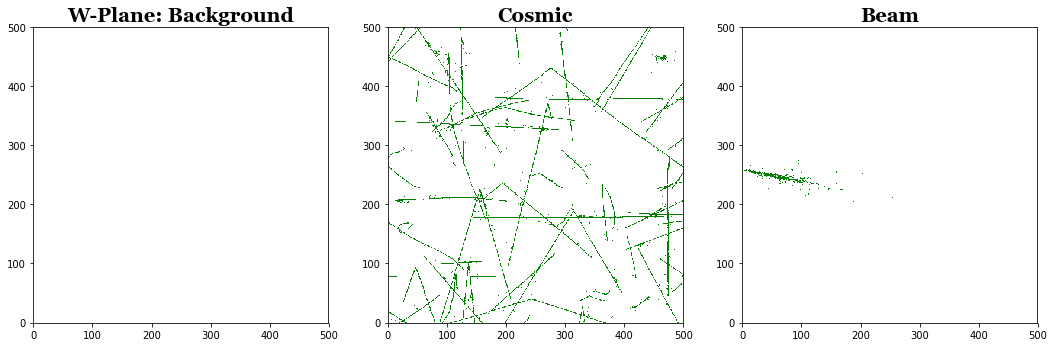

In [9]:
i = 2
xImage = X[i].reshape(X[i].shape[0], image_width, image_height)
yImage = y[i].reshape(y[i].shape[0], image_width, image_height)

unique_values, unique_counts = np.unique(y[i], return_counts=True)
print('Label values:',unique_values)
print('Label counts:',unique_counts)

categories = ['{}: Background'.format(plane_name[i]),'Cosmic','Beam']

fig, axes = plt.subplots(1, len(unique_values), figsize=(18,12), facecolor='w')
for index, value in enumerate(unique_values):
    ax = axes[index]
    mask = (yImage[0] == value)
    ax.imshow(xImage[0]*mask, interpolation='none', cmap='ocean_r', origin='lower',vmin=0., vmax=1.0)
    ax.set_title(categories[index],fontsize=20,fontname='Georgia',fontweight='bold')
plt.show()
fig.savefig('plots/BkgCosmicBeam_{}.pdf'.format(plane_name[i]), bbox_inches='tight')